# 1. Importing Libraries & Dataframes

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/zoipisourika/Desktop/Career Foundry/Data Immersion/Achievement 4/Instacart Basket Analysis/02 Data'

In [3]:
# Import dataframe

ords_prods_merge = pd.read_pickle(os.path.join(path, "Prepared Data", 'orders_products_with_flags.pkl'))

## Bar charts

<AxesSubplot:>

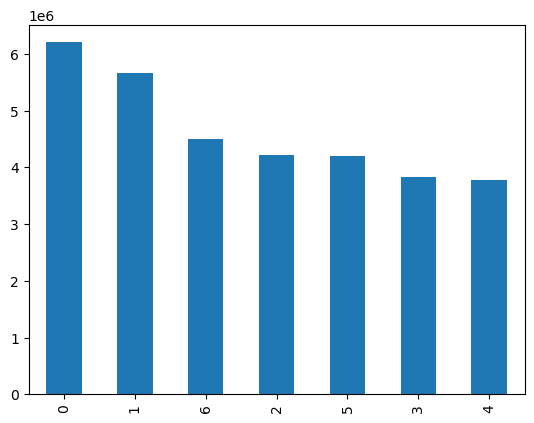

In [5]:
# Create bar chart for days of the week

ords_prods_merge['orders_day_of_the_week'].value_counts().plot.bar()

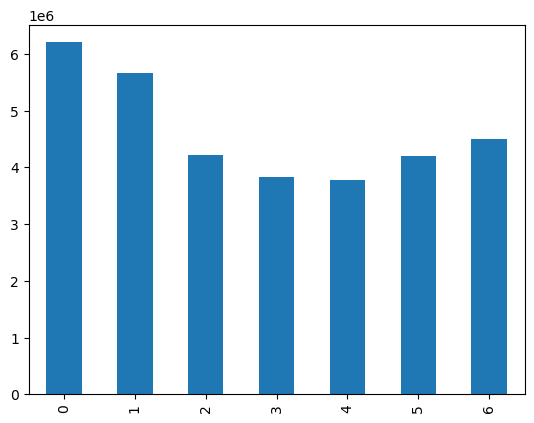

In [41]:
# Create bar object and use different colours

bar = ords_prods_merge['orders_day_of_the_week'].value_counts().sort_index().plot.bar()

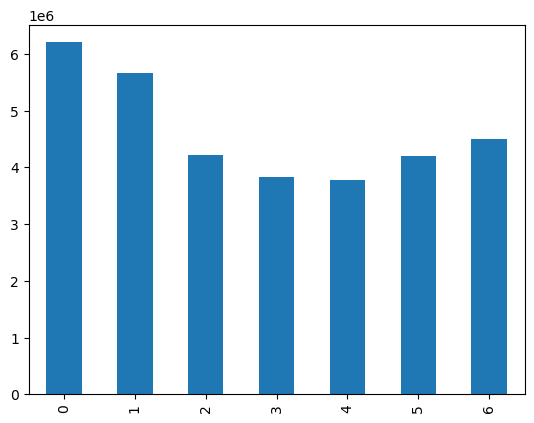

In [42]:
# Check retrieval command

bar.figure

In [14]:
# Set up a second path

path2 = r'/Users/zoipisourika/Desktop/Career Foundry/Data Immersion/Achievement 4/Instacart Basket Analysis/'

In [43]:
#Save bar chart as image

bar.figure.savefig(os.path.join(path2, "04 Analysis", "Visualisations",'bar_orders_dow.png'))

## Histograms & Scatterplots

<AxesSubplot:ylabel='Frequency'>

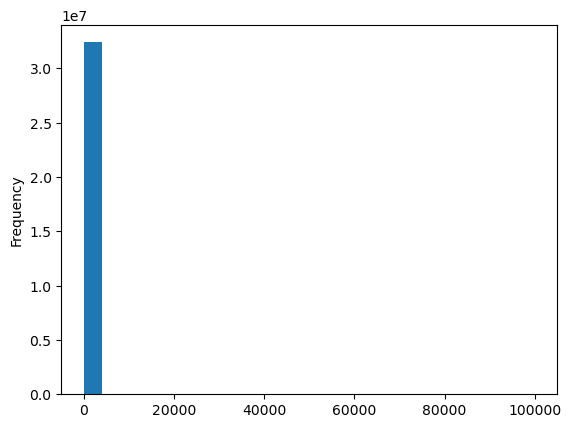

In [18]:
# Create histogram

ords_prods_merge['prices'].plot.hist(bins = 25)

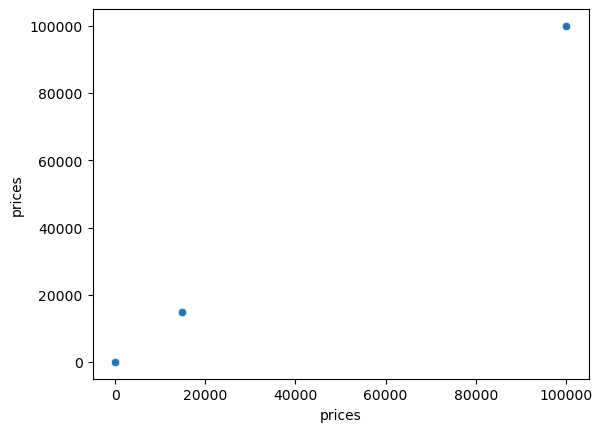

In [20]:
# Create scatterplot

scatterplot = sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [23]:
# Locate outliers in dataframe

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,Loyalty_flag,average_spend_user,Spending_flag,median_order_freq_user,Order_frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular Customer,108.648299,High Spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Fewest orders,40,Regular Customer,108.648299,High Spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New Customer,1154.792308,High Spender,11.5,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Busiest day,Busiest days,Fewest orders,4,New Customer,1154.792308,High Spender,11.5,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular Customer,114.426619,High Spender,20.0,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busiest days,Fewest orders,39,Regular Customer,1106.743956,High Spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busiest days,Most orders,39,Regular Customer,1106.743956,High Spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Least busy,Most orders,15,Regular Customer,451.153540,High Spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Least busy,Average orders,12,Regular Customer,1178.381871,High Spender,7.0,Frequent customer


In [24]:
pd.options.display.max_columns = None

In [1]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

NameError: name 'ords_prods_merge' is not defined

In [26]:
# Assigning missing values

ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [27]:
# Check output

ords_prods_merge['prices'].max()

25.0

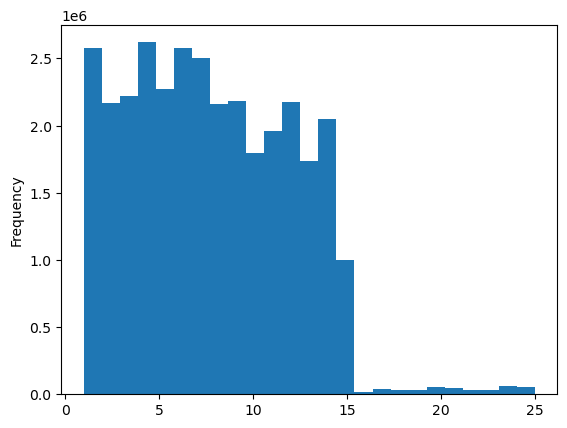

In [29]:
# Recreate a histogram for prices

hist = ords_prods_merge['prices'].plot.hist(bins = 25)

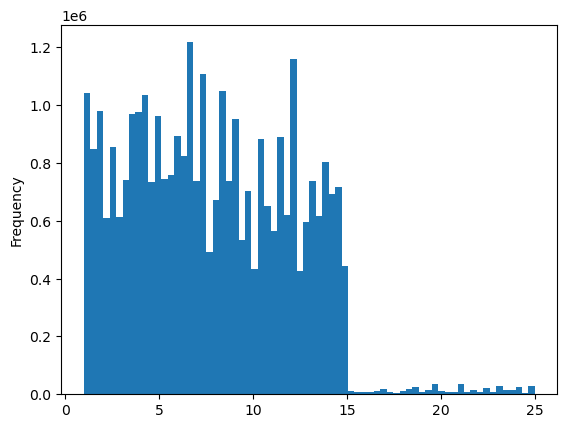

In [30]:
# Increase level of granularity

hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [31]:
# Export histogram for prices

hist.figure.savefig(os.path.join(path2, "04 Analysis", "Visualisations", "histogram_prices.png"))

### Sampling

In [33]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [34]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [35]:
# Split dataframe in two samples

big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

In [36]:
len(ords_prods_merge)

32404859

In [37]:
len(big)+len(small)

32404859

In [38]:
# Reducing my samples to only those columns necessary for the chart

df_2 = small[['orders_day_of_the_week','prices']]

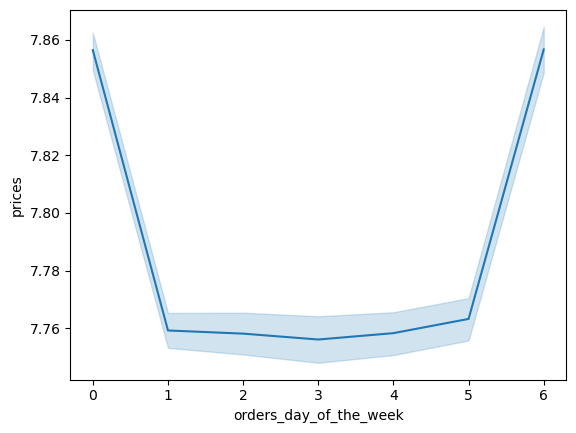

In [39]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_the_week',y = 'prices')

In [40]:
line.figure.savefig(os.path.join(path2, "04 Analysis", "Visualisations", "line_chart_price_dow.png"))